**P1 Decision Tree**

- Data Processing

Deleting rows which have invalid data.

In [2]:
import pandas as pd
data = pd.read_csv("penguins.csv")
data.dropna(how= 'any')
print("Done.")

Done.


- Data statistics

Visualize the statistics.

Done.


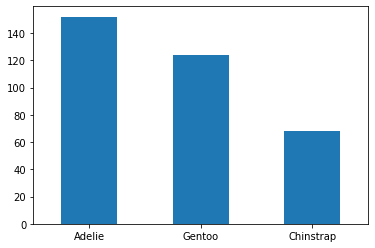

In [3]:
import matplotlib.pyplot as plt
import numpy as np
data["species"].value_counts().plot(kind='bar', rot = 0)
print("Done.")

In [5]:
def vil(data, type):
    data = data[data["species"]==type]
    l = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
    print("This is the analysis for %s." %type)
    row, col = 2, 3
    fig, ax = plt.subplots(row, col, figsize = (10, 4))
    plt.subplot(1,2,1)
    data["island"].value_counts().plot(kind =  'bar', rot = 0)
    plt.subplot(1,2,2)
    data["sex"].value_counts().plot(kind =  'bar', rot = 0)
    fig.tight_layout()
    for i in range(len(l)):
        name = l[i]
        mean = data[name].mean()
        var = data[name].var()
        print("The mean and variance of %s are %f and %f."%(name, mean, var))
    

This is the analysis for Adelie.
The mean and variance of bill_length_mm are 38.791391 and 7.093725.
The mean and variance of bill_depth_mm are 18.346358 and 1.480237.
The mean and variance of flipper_length_mm are 189.953642 and 42.764503.
The mean and variance of body_mass_g are 3700.662252 and 210282.891832.


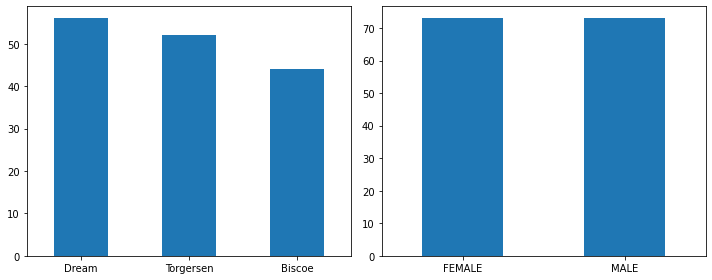

In [6]:
vil(data, "Adelie")

This is the analysis for Chinstrap.
The mean and variance of bill_length_mm are 48.833824 and 11.150630.
The mean and variance of bill_depth_mm are 18.420588 and 1.289122.
The mean and variance of flipper_length_mm are 195.823529 and 50.863916.
The mean and variance of body_mass_g are 3733.088235 and 147713.454785.


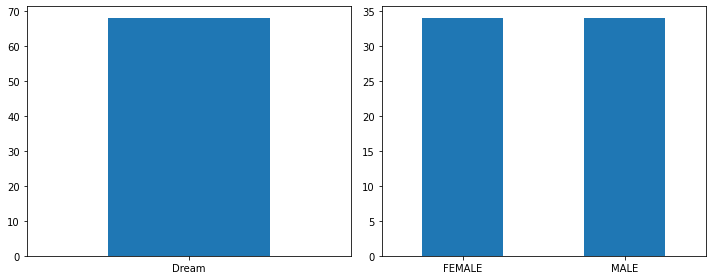

In [7]:
vil(data, "Chinstrap")

This is the analysis for Gentoo.
The mean and variance of bill_length_mm are 47.504878 and 9.497845.
The mean and variance of bill_depth_mm are 14.982114 and 0.962792.
The mean and variance of flipper_length_mm are 217.186992 and 42.054911.
The mean and variance of body_mass_g are 5076.016260 and 254133.180061.


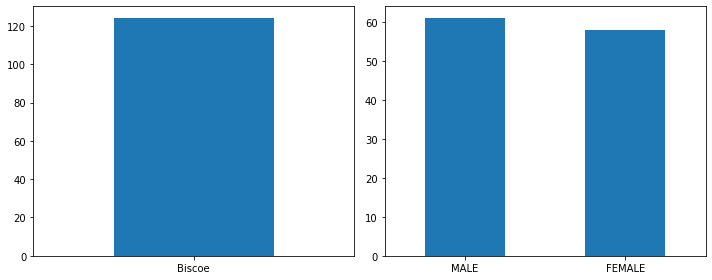

In [8]:
vil(data, "Gentoo")

- Decision Tree

In [9]:
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

def dt(data, n1, n2, J = False):
    l = ["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
    d = data[[i for i in l]]
    target = data["species"]
    le = LabelEncoder()
    d_copy = d.copy()
    for col in d.columns:                                            
        d_copy[col] = le.fit_transform(d[col])

    x_train,x_test,y_train,y_test = train_test_split(d_copy, target, test_size=0.25)
    clf = tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth = n1, min_samples_leaf = n2)
    clf = clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    print("The accuracy of training and testing set is %f and %f."%(score_train, score_test))
    if J:
        dot_data = export_graphviz(clf, feature_names=l,class_names=["Adelie","Chinstrap","Gentoo"] ,filled=False, rounded=True, out_file=None)

        graph = graph_from_dot_data(dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data)
        return graph


The accuracy of training and testing set is 0.957364 and 0.930233.


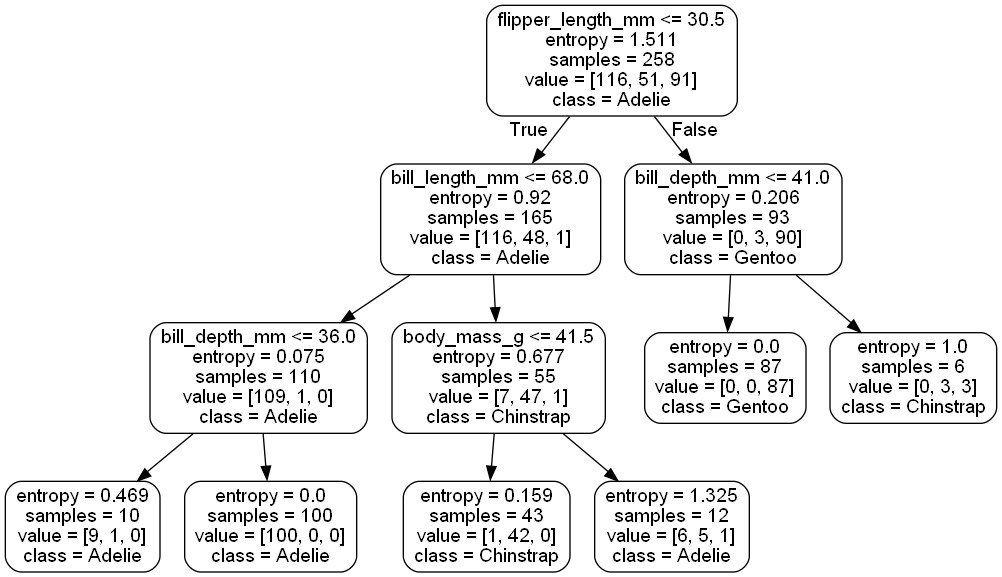

In [10]:
Image(dt(data, 3, 5, J = True).create_png())

In [11]:
dt(data, 4, 4)

The accuracy of training and testing set is 0.972868 and 0.930233.


In [12]:
dt(data, 5, 6)

The accuracy of training and testing set is 0.968992 and 0.930233.


- Bagging of trees

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

def bt(data, n1, n2, J = False):
    l = ["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
    d = data[[i for i in l]]
    target = data["species"]
    le = LabelEncoder()
    d_copy = d.copy()
    for col in d.columns:                                            
        d_copy[col] = le.fit_transform(d[col])

    x_train,x_test,y_train,y_test = train_test_split(d_copy, target, test_size=0.25)
    dt = tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth = n1, min_samples_leaf = n2)
    dt = dt.fit(x_train, y_train)
    clf = BaggingClassifier(base_estimator=dt, n_estimators = 1, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

    clf = clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    print("The accuracy of training and testing set is %f and %f."%(score_train, score_test))

    if J:
        clf_c = clf.estimators_[0]
        clf_c = clf_c.fit(x_train, y_train)
        dot_data = export_graphviz(clf_c, feature_names = ["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"] , class_names=["Adelie","Chinstrap","Gentoo"], filled=False, rounded=True, out_file=None)
        graph = graph_from_dot_data(dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data)
        return graph



The accuracy of training and testing set is 0.949612 and 0.941860.


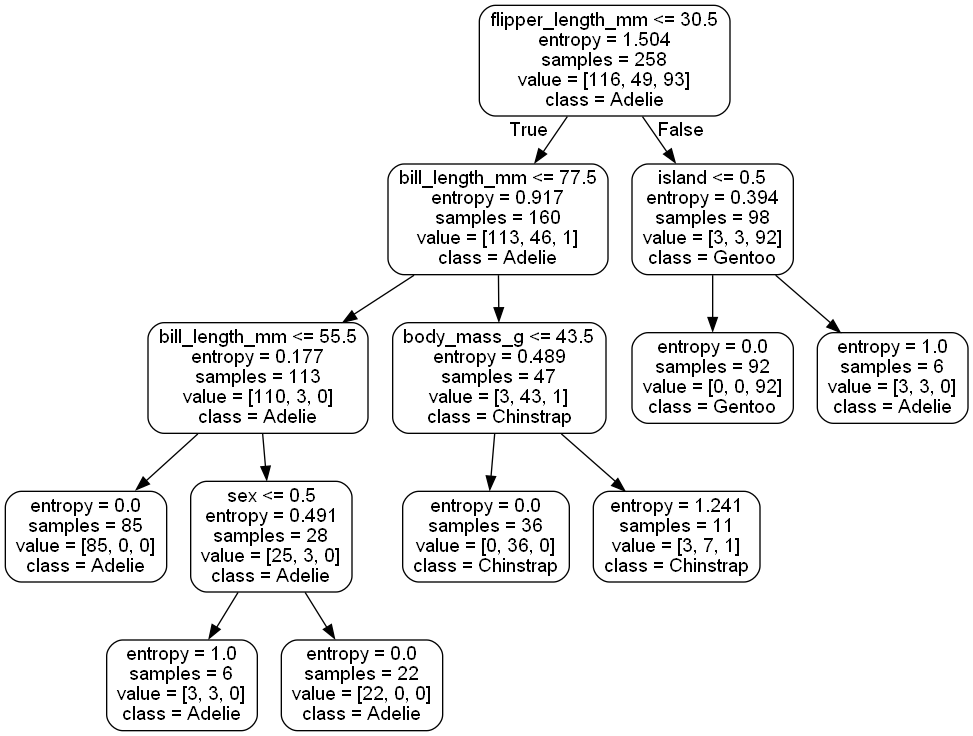

In [14]:
Image(bt(data, 5, 6, J = True).create_png())

In [15]:
bt(data, 3, 6)

The accuracy of training and testing set is 0.945736 and 0.976744.


In [16]:
bt(data, 4, 4)

The accuracy of training and testing set is 0.949612 and 0.930233.


- Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

def rf(data, n1, n2):
    l = ["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
    d = data[[i for i in l]]
    target = data["species"]
    le = LabelEncoder()
    d_copy = d.copy()
    for col in d.columns:                                            
        d_copy[col] = le.fit_transform(d[col])

    x_train,x_test,y_train,y_test = train_test_split(d_copy, target, test_size=0.25)
    clf = RandomForestClassifier(n_estimators = n2, max_features = n1, random_state = 222)
    clf = clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    print("The accuracy of training and testing set is %f and %f."%(score_train, score_test))


In [28]:
rf(data, 4, 4)

The accuracy of training and testing set is 0.980620 and 0.941860.


In [27]:
rf(data, 5, 6)

The accuracy of training and testing set is 0.992248 and 0.976744.


In [29]:
rf(data, 7, 8)

The accuracy of training and testing set is 0.972868 and 0.930233.


- Plot the curve of $bias^2$ w.r.t. different numbers of trees in random forests. 

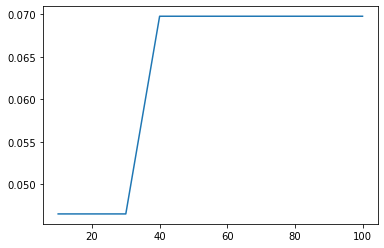

In [40]:
from mlxtend.evaluate import bias_variance_decomp

l = ["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
d = data[[i for i in l]]
l_bias = []
l_var = []
l_x = []
target = data["species"]
le = LabelEncoder()
d_copy = d.copy()
for col in d.columns:                                            
        d_copy[col] = le.fit_transform(d[col])

target_copy = target.copy()
target_copy = le.fit_transform(target_copy)
x_train,x_test,y_train,y_test = train_test_split(d_copy, target_copy, test_size=0.25)
x_train,x_test = x_train.values,x_test.values
for i in range(10):
        clf = RandomForestClassifier(n_estimators = (i+1)*10, max_features = 6, random_state = 222)
        clf = clf.fit(x_train, y_train)

        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
                clf, x_train, y_train, x_test, y_test, 
                loss='0-1_loss',
                random_seed=123)

        l_bias.append(avg_bias*2)
        l_var.append(avg_var)
        l_x.append((i+1)*10)

plt.plot(l_x, l_bias)


There is a gap between n = 30 and n = 40. In general, the $bias^2$ increases when n increases. 

- Plot the curve of $var$ w.r.t. different numbers of trees in random forests. 

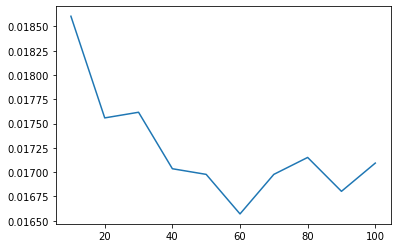

In [42]:
plt.plot(l_x, l_var)

The variance firstly decreases and then increases when n increases. In n = 60, the model has the least variance value.